# Lab02: Geographic Data / Maps
![Map](http://geopandas.org/_images/world_randomcolors.png)

## Documentation
[GeoPandas](http://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas **extends the datatypes used by pandas** to allow spatial operations on geometric types.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Structures
Similarly to pandas, GeoPandas provides two data structures for working with geographic data:
* GeoDataFrame
* GeoSeries

### GeoSeries
A `GeoSeries` is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).
* Points/Multi-Points
* Lines/Multi-Lines
* Polygons/Multi-Polygons

### GeoDataFrame
A ``GeoDataFrame`` is a tabular data structure that contains one ``GeoSeries`` and one ore more other column holding additional information related to that ``GeoSeries``.

The most important property of a ``GeoDataFrame`` is that it always has one ``GeoSeries`` column that holds a special status. This ``GeoSeries`` is referred to as the ``GeoDataFrame``'s "geometry". When a spatial method is applied to a ``GeoDataFrame`` (or a spatial attribute like area is called), these commands will always act on the "geometry" column.

### Getting Started with GeoPandas

In [2]:
# let's start by checking which datasets are provided for us by GeoPandas:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [3]:
# next, we read in the dataset by getting its path and calling the read_file(...) function
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# you should be familiar with the head(...) function, as we used it before with pandas already!
world.head()

C:\Users\quint\AppData\Local\Temp\ipykernel_22572\628708735.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


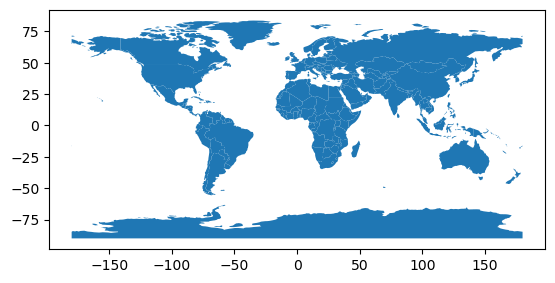

In [4]:
# now, let's put the information to use by calling the the plot(...) method of the GeoDataFrame.
world.plot();

In [5]:
# you may wonder what coordinate reference system is used in the 'geometry' column
# we can access this data by having a look at the crs attribute of the GeoDataFrame
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

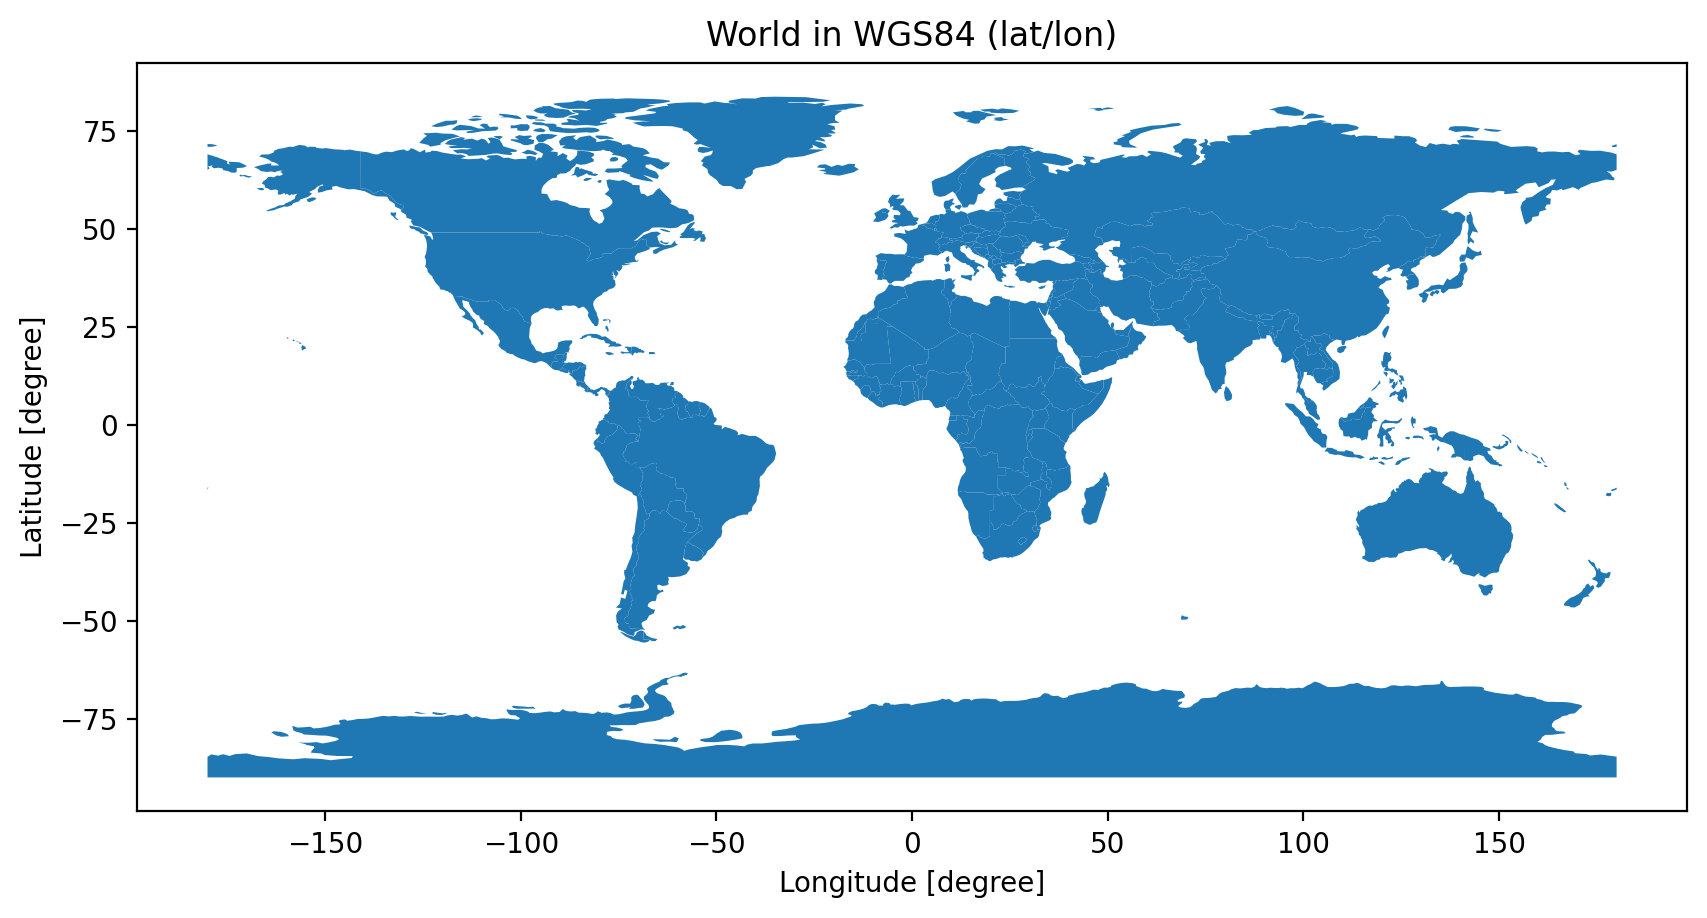

In [6]:
# manipulate the figure size as well as the resolution of the image,
# add the information contained in crs to populate the title as well as x-, and y-label
fig, ax = plt.subplots(dpi=200, figsize=(10,10))
world.plot(ax=ax)
plt.title('World in WGS84 (lat/lon)')
plt.ylabel('Latitude [degree]')
plt.xlabel('Longitude [degree]')
plt.show()

### Applying transformations to the data contained in a ``GeoSeries`` 

In [7]:
# what do we have to do if we only want to 
# plot the centroids of each country contained in our GeoDataFrame?

# first, we need to change the coordinate reference system
# we use the epsg code for the WGS 84 / World Mercator projection here
world = world.to_crs(epsg=3395)

In [8]:
# let's verify the change in the coordinate system:
world.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# next, we calculate and plot the centroids by accessing the centroid attribute of our GeoDataFrame
world['centroid'] = world.centroid

In [10]:
# if we want to use these centroids as our GeoDataFrame's new Geometry, we have to manually set it:
world = world.set_geometry('centroid')

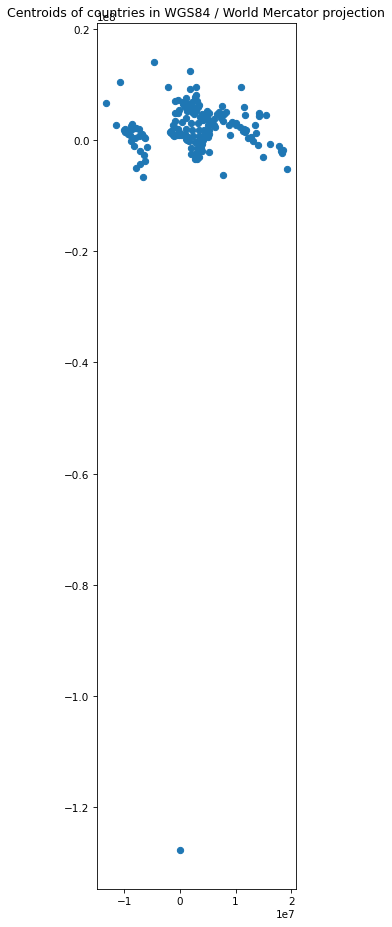

In [11]:
# now, we can plot our centroids by simply calling the GeoDataFrame's plot(...) function
fig, ax = plt.subplots(dpi=75, figsize=(15,15))
world.plot(ax=ax)
plt.title('Centroids of countries in WGS84 / World Mercator projection')
plt.show()

In [12]:
# can you figure out what went wrong in the plot above?

In [13]:
# seems like we have to remove Antarctica to improve the readability of our plot!
world = world[~world.name.str.contains('Antarctic')]

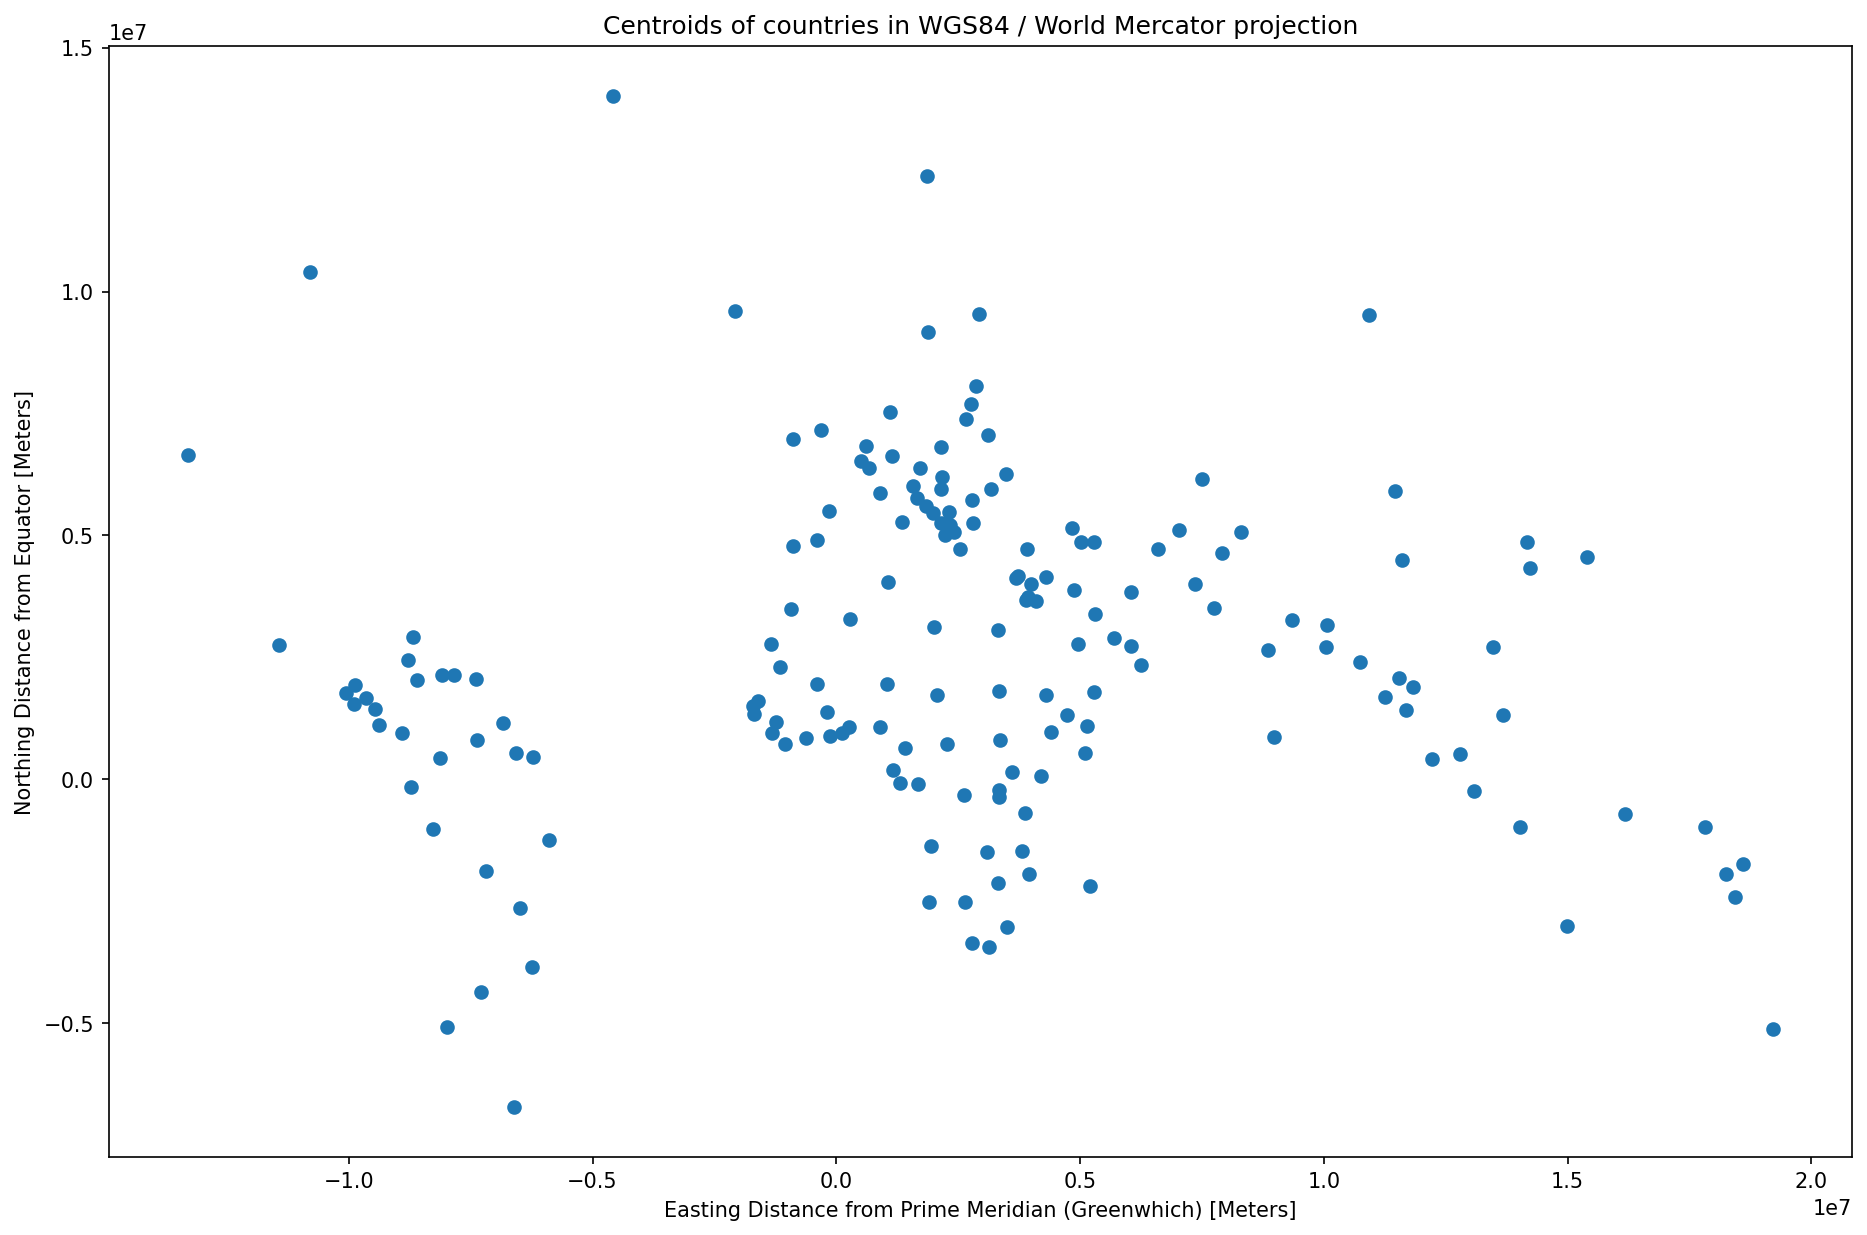

In [14]:
# let's try again - we also add the correct units for the x-, and y-axis
# see either the output of world.crs or
# https://epsg.io/4326 and
# https://epsg.io/3395
# for details on the units of the two coordinate systems (WGS84 vs. World Mercator).
fig, ax = plt.subplots(dpi=150, figsize=(15,15))
world.plot(ax=ax)
plt.title('Centroids of countries in WGS84 / World Mercator projection')
plt.ylabel('Northing Distance from Equator [Meters]')
plt.xlabel('Easting Distance from Prime Meridian (Greenwhich) [Meters]')
plt.show()

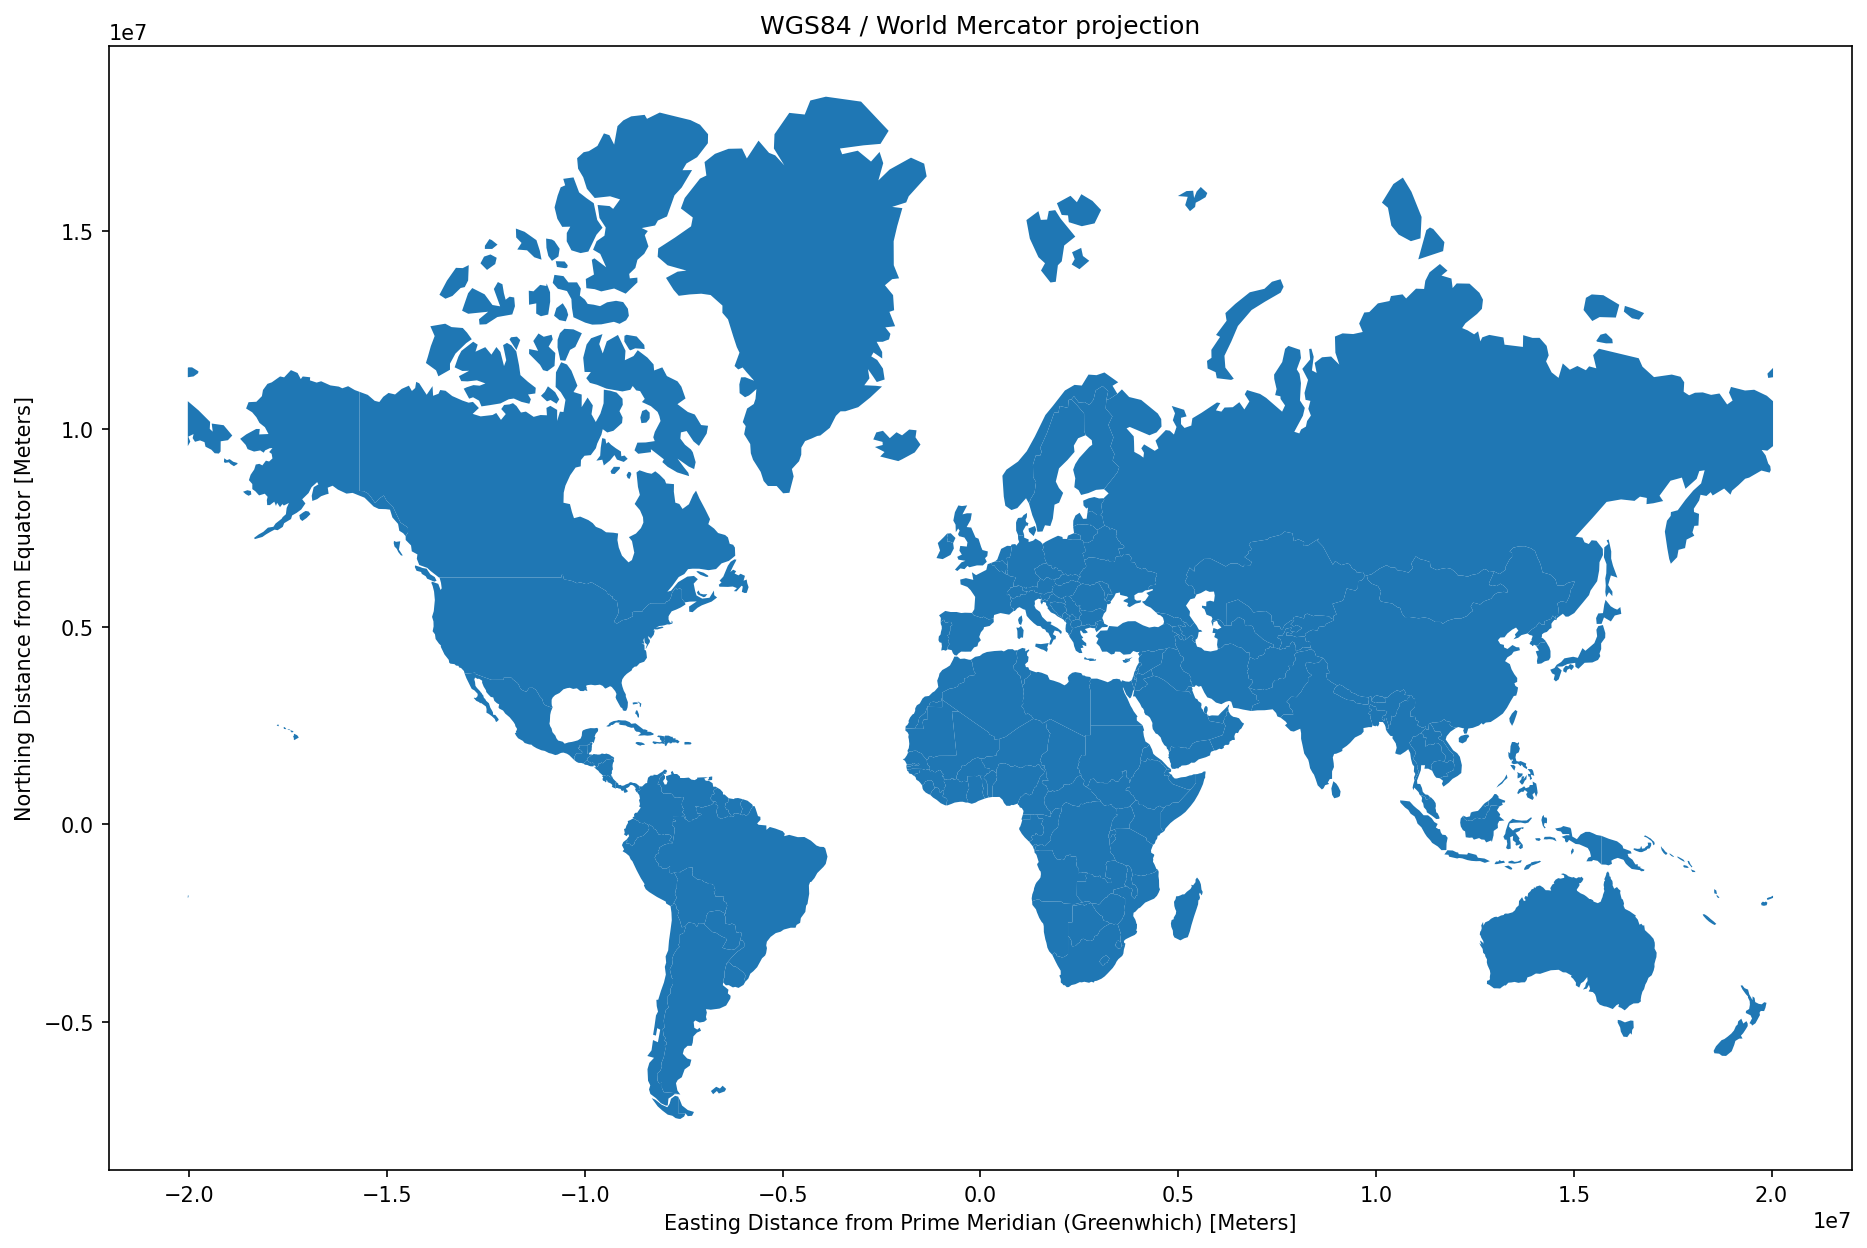

In [15]:
# lastly, we revert our change by calling the set_geometry(...) function on the column 'geometry'
world = world.set_geometry('geometry')

# to verify the change, we plot the data one last time:
fig, ax = plt.subplots(dpi=150, figsize=(15,15))
world.plot(ax=ax)
plt.title('WGS84 / World Mercator projection')
plt.ylabel('Northing Distance from Equator [Meters]')
plt.xlabel('Easting Distance from Prime Meridian (Greenwhich) [Meters]')
plt.show()

### Displaying additional information in your ``GeoPandas`` plots

In [16]:
# let's check again what other information is available to us in the dataset we downloaded:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((20037508.343 -1800679.237, 200...",POINT (18248888.547 -1945389.549)
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((3774143.866 -105050.440, 3792946.708...",POINT (3869303.871 -695667.878)
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-964649.018 3185897.152, -964597.245...",POINT (-1348371.700 2776620.584)
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-10797700.204 10408580.130)
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-13301024.966 6639297.292)


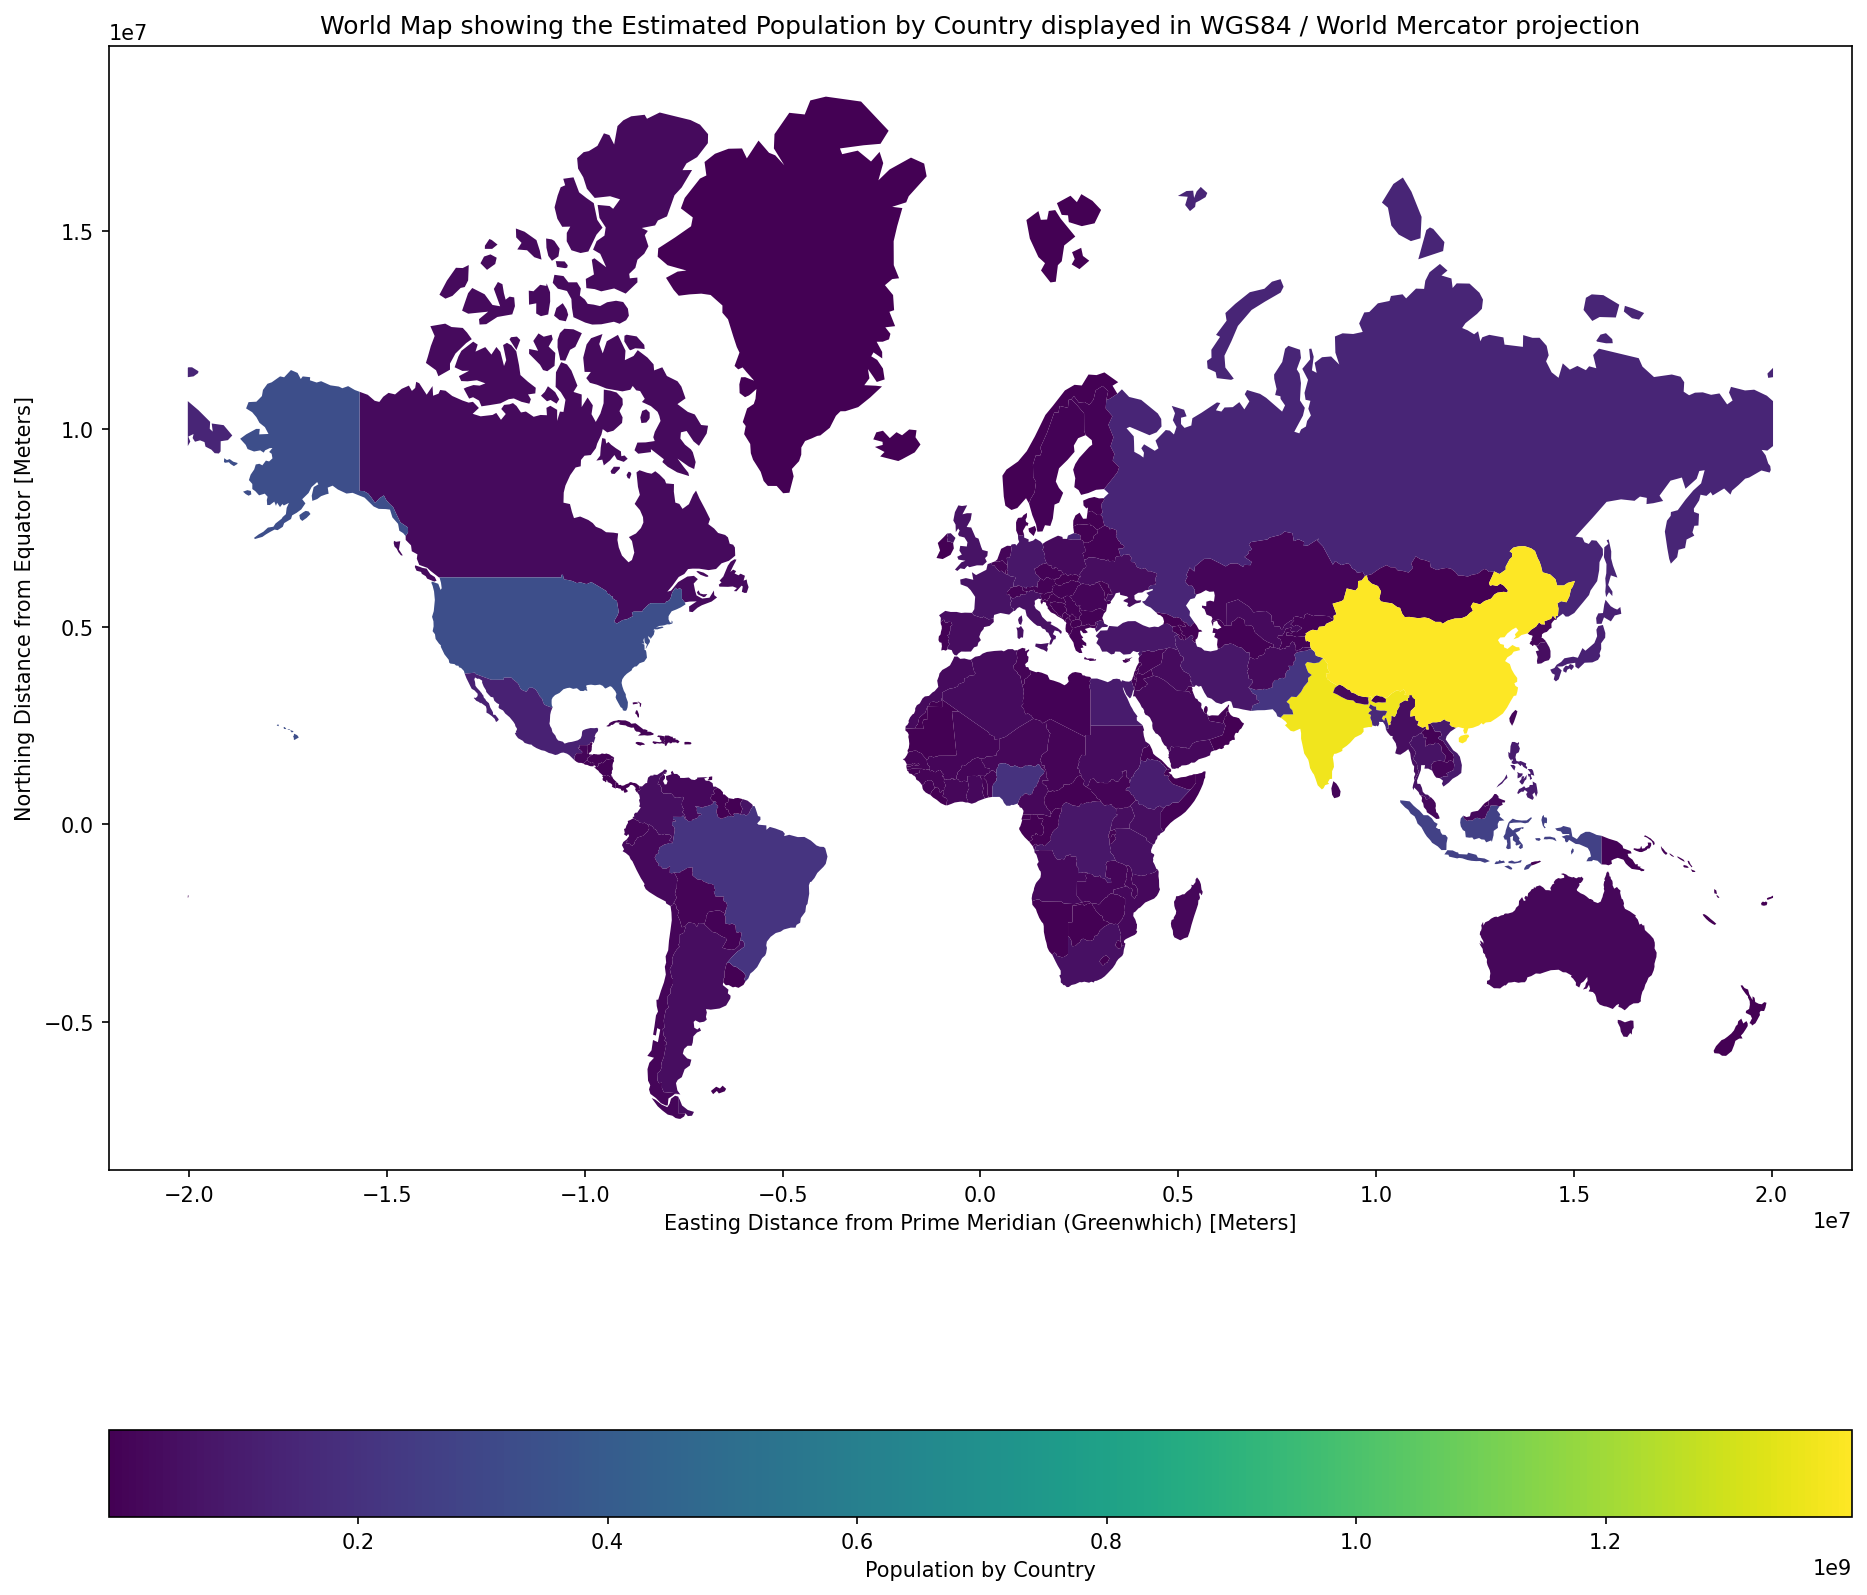

In [17]:
# by specifying a numeric column, you may create a so called Choropleth map
# this means that information is displayed by coloring shapes - countries in our case - in different colors
# think of it like a heatmap

# here, we specify 'pop_est' as the column to use in the plot, and add a horizontal legend with a label
fig, ax = plt.subplots(dpi=150, figsize=(15,15))
world.plot(
    column='pop_est',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Population by Country',
        'orientation': 'horizontal',
    }
)

plt.title('World Map showing the Estimated Population by Country displayed in WGS84 / World Mercator projection')
plt.ylabel('Northing Distance from Equator [Meters]')
plt.xlabel('Easting Distance from Prime Meridian (Greenwhich) [Meters]')
plt.show()

### Focusing on a specific part of the world

In [18]:
# now, we want to have a closer look at Europe's population
# we do this by selecting all rows from the dataset that have their 'continent' set to 'Europe'
europe = world.loc[world['continent'] == 'Europe', :]

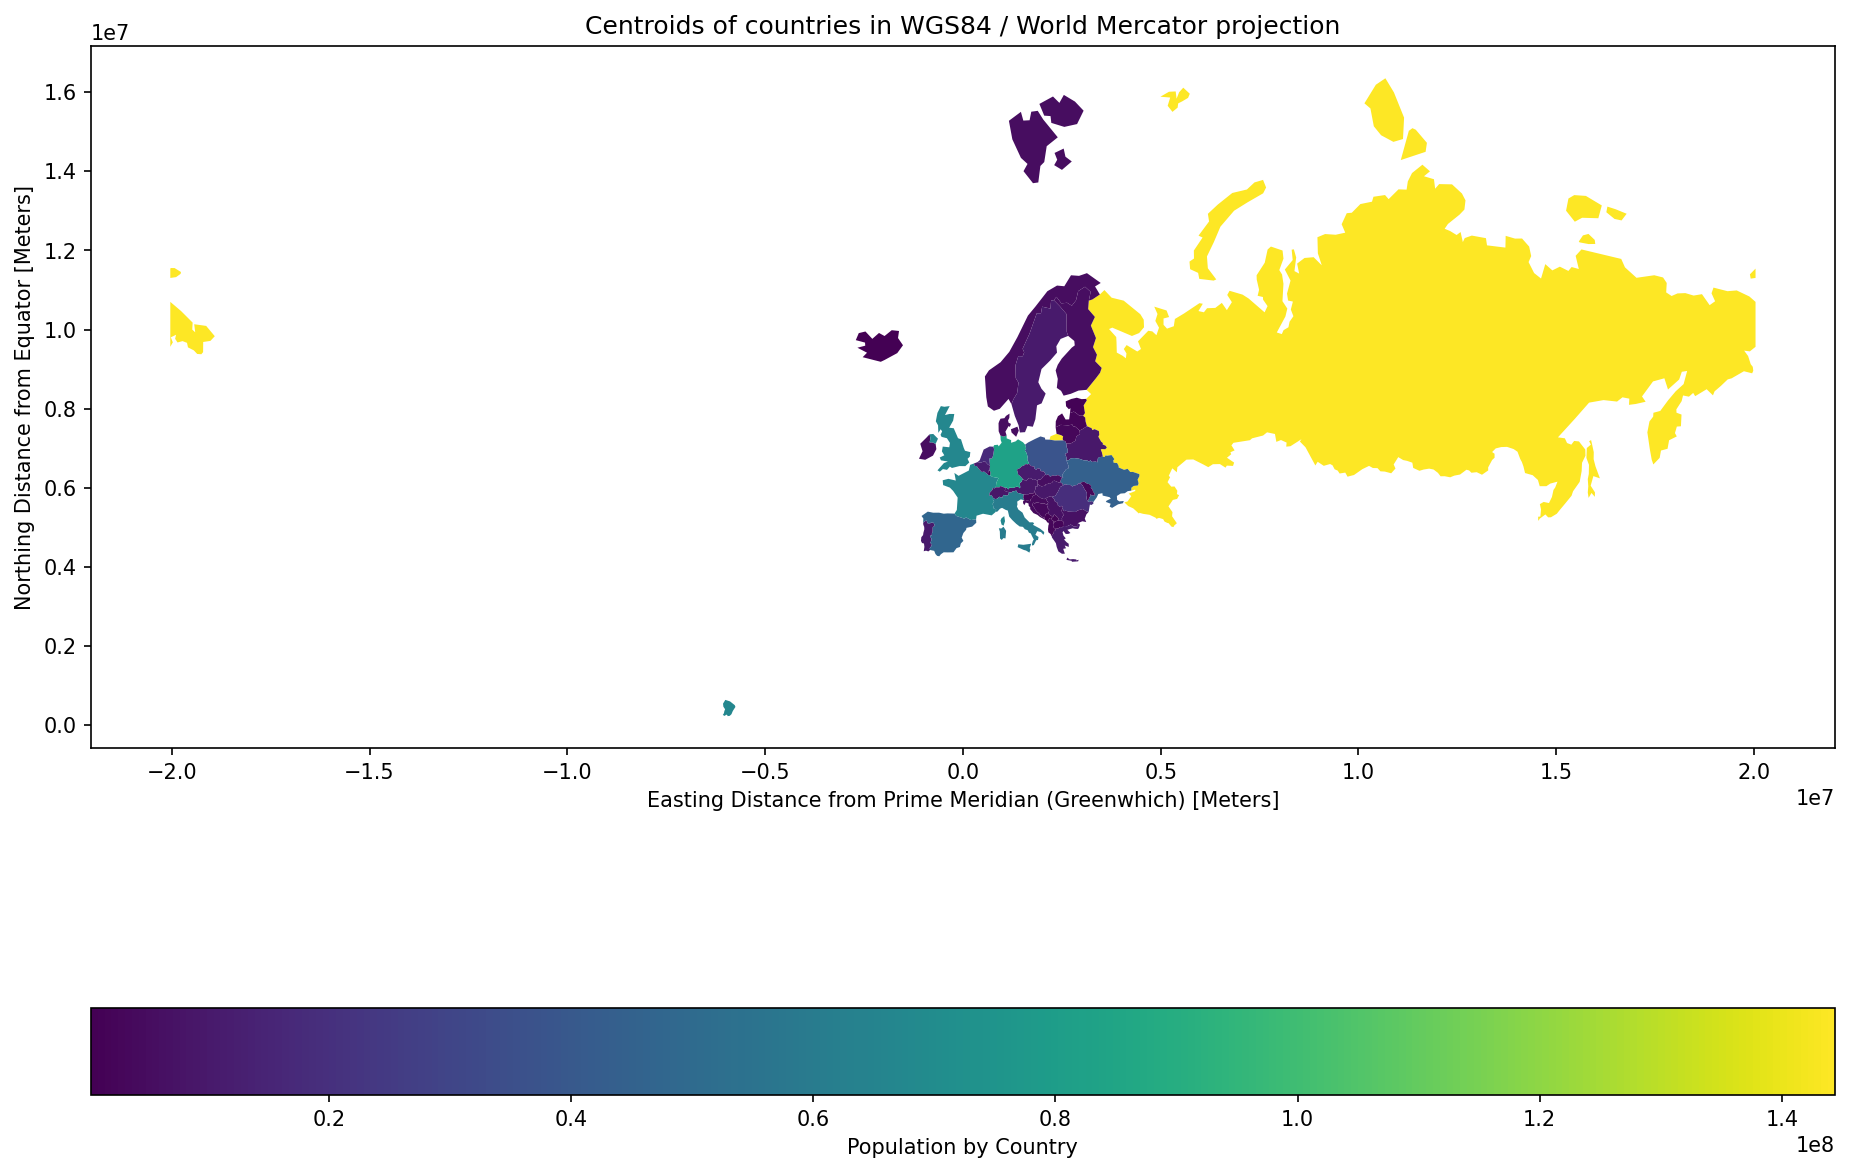

In [19]:
# redraw the plot:
fig, ax = plt.subplots(dpi=150, figsize=(15,15))
europe.plot(
    column='pop_est',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Population by Country',
        'orientation': 'horizontal',
    }
)

plt.title('Centroids of countries in WGS84 / World Mercator projection')
plt.ylabel('Northing Distance from Equator [Meters]')
plt.xlabel('Easting Distance from Prime Meridian (Greenwhich) [Meters]')
plt.show()

 
### Can I use my own data?
Sure. What about **worldwide internet usage** (as % of population)? This data is provided by [World Bank Open Data](https://data.worldbank.org/).

For your convenience, we already included `internet_usage.csv` with this template.

In [20]:
df = pd.read_csv('internet_usage.csv', skiprows=3)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.940634,10.552158,13.052010,15.990277,17.165587,20.332119,23.657366,26.448284,NaN,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.454545,5.900000,7.000000,8.260000,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.335555,12.901207,15.470625,19.421850,21.369414,24.676247,29.741679,32.418191,NaN,NaN
4,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.500000,8.900000,21.400000,29.000000,29.000000,32.000000,35.000000,36.000000,NaN,NaN


Get some information about the data. Use a method to get some stats (mean, count, standard deviation, percentiles, etc.) from the data frame. Hint: it is the same function as with the pandas dataframe.

In [21]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,246.000000,246.000000,244.000000,241.000000,243.000000,242.000000,173.000000,174.000000,75.000000,0.0
mean,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,38.596089,40.996653,43.723177,47.126527,50.354506,54.201263,58.989973,61.996830,80.990743,NaN
std,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,27.513328,28.022251,27.996541,27.632915,27.825226,27.362376,26.372645,25.621035,14.496306,NaN
min,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.990000,1.083733,1.177119,1.308907,5.000000,5.200000,10.400000,NaN
25%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,11.133685,13.466594,16.950000,20.439528,24.575521,28.279416,35.000000,39.750000,73.180509,NaN
50%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,36.158753,39.212994,41.669859,47.569760,53.000970,58.447748,64.336108,68.124002,83.055591,NaN
75%,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,61.478119,65.360000,68.187500,71.064068,75.188889,78.558053,80.726843,82.837533,90.361501,NaN
max,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,96.209800,96.546800,98.160000,98.323610,98.240016,99.546612,99.652849,99.701493,100.000000,NaN


Hmm.. A lot of missing data. Let's check the ``info(...)`` function to see how many missing values are present in each column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            7 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            7 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            7 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

Select the year you want to focus your research on along with the column ``Country Code``.

In [23]:
year = '2017'
df = df.loc[:, ['Country Code', year]]
df.head()

,Country Code,2017
0,ABW,97.170000
1,AFE,20.332119
2,AFG,NaN
3,AFW,24.676247
4,AGO,32.000000


Finally, treat the missing values.

In [24]:
# there are different methods to do this. the simplest one is to just drop rows without information.
df = df.dropna(axis='index',)
df.head()

,Country Code,2017
0,ABW,97.170000
1,AFE,20.332119
3,AFW,24.676247
4,AGO,32.000000
5,ALB,62.400000


### Joining the two datasets
We need to merge the two datasets to combine the spatial information contained in ``world`` with the internet usage we saved to ``df``.

To do this correctly, we want to make sure we join the information on a column that is present in both datasets.
Let's set this column as the **index** of both our DataFrames before joining.

In [25]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((20037508.343 -1800679.237, 200...",POINT (18248888.547 -1945389.549)
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((3774143.866 -105050.440, 3792946.708...",POINT (3869303.871 -695667.878)
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-964649.018 3185897.152, -964597.245...",POINT (-1348371.700 2776620.584)
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-10797700.204 10408580.130)
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-13301024.966 6639297.292)


In [26]:
df.head()

,Country Code,2017
0,ABW,97.170000
1,AFE,20.332119
3,AFW,24.676247
4,AGO,32.000000
5,ALB,62.400000


In [27]:
# as you can see by looking at the information above,
# the columns 'Country Code' and 'iso_a3' both contain three-letter country codes.
# let's set these columns as the indices of our DataFrames

world = world.set_index('iso_a3')
df = df.set_index('Country Code')

In [28]:
# verify the changes:
world.head()

,pop_est,continent,name,gdp_md_est,geometry,centroid
iso_a3,,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((20037508.343 -1800679.237, 200...",POINT (18248888.547 -1945389.549)
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((3774143.866 -105050.440, 3792946.708...",POINT (3869303.871 -695667.878)
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-964649.018 3185897.152, -964597.245...",POINT (-1348371.700 2776620.584)
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-10797700.204 10408580.130)
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-13301024.966 6639297.292)


In [29]:
df.head()

,2017
Country Code,
ABW,97.170000
AFE,20.332119
AFW,24.676247
AGO,32.000000
ALB,62.400000


In [30]:
world = world.join(df)
world.head()

,pop_est,continent,name,gdp_md_est,geometry,centroid,2017
iso_a3,,,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((20037508.343 -1800679.237, 200...",POINT (18248888.547 -1945389.549),49.966373
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((3774143.866 -105050.440, 3792946.708...",POINT (3869303.871 -695667.878),15.999999
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-964649.018 3185897.152, -964597.245...",POINT (-1348371.700 2776620.584),NaN
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-10797700.204 10408580.130),92.701372
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",POINT (-13301024.966 6639297.292),87.274889


## WARMUP TASK: Plot internet usage (5%)
Now plot the 2017 internet usage for each country in a world map

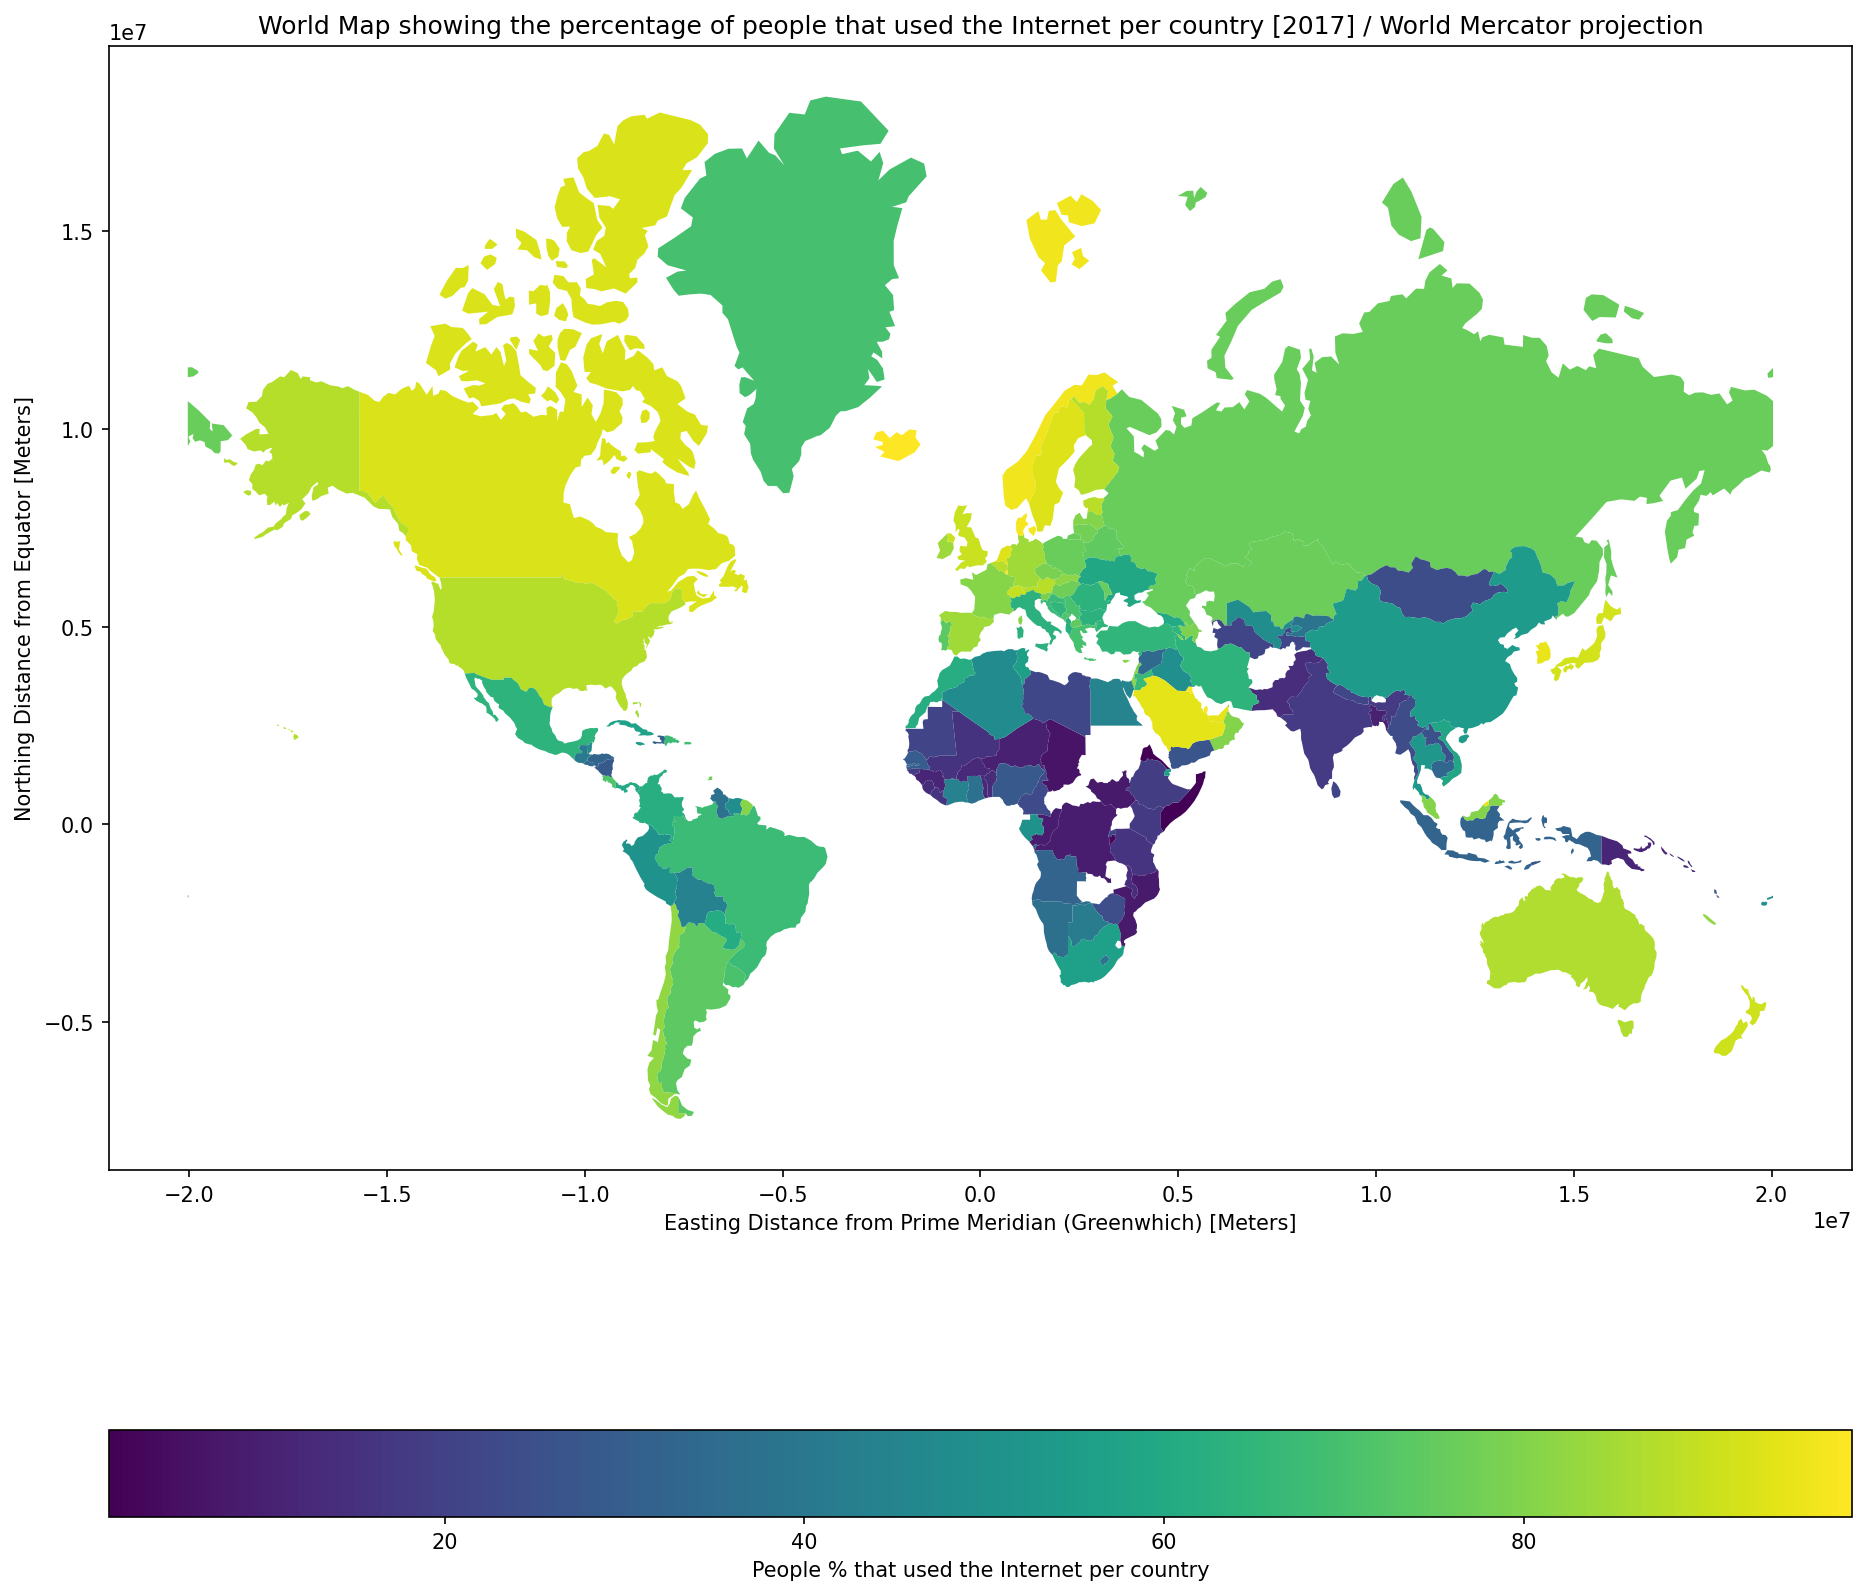

In [31]:
# YOUR CODE HERE
fig, ax = plt.subplots(dpi=150, figsize=(15,15))
world.plot(
    column='2017',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'People % that used the Internet per country',
        'orientation': 'horizontal',
    }
)

plt.title('World Map showing the percentage of people that used the Internet per country [2017] / World Mercator projection')
plt.ylabel('Northing Distance from Equator [Meters]')
plt.xlabel('Easting Distance from Prime Meridian (Greenwhich) [Meters]')
plt.show()

## TASK 1:  Plot European Internet usage (40%)

Merge the ``europe`` GeoDataFrame (european countries only) with the internet usage data in ``df`` and plot the result.

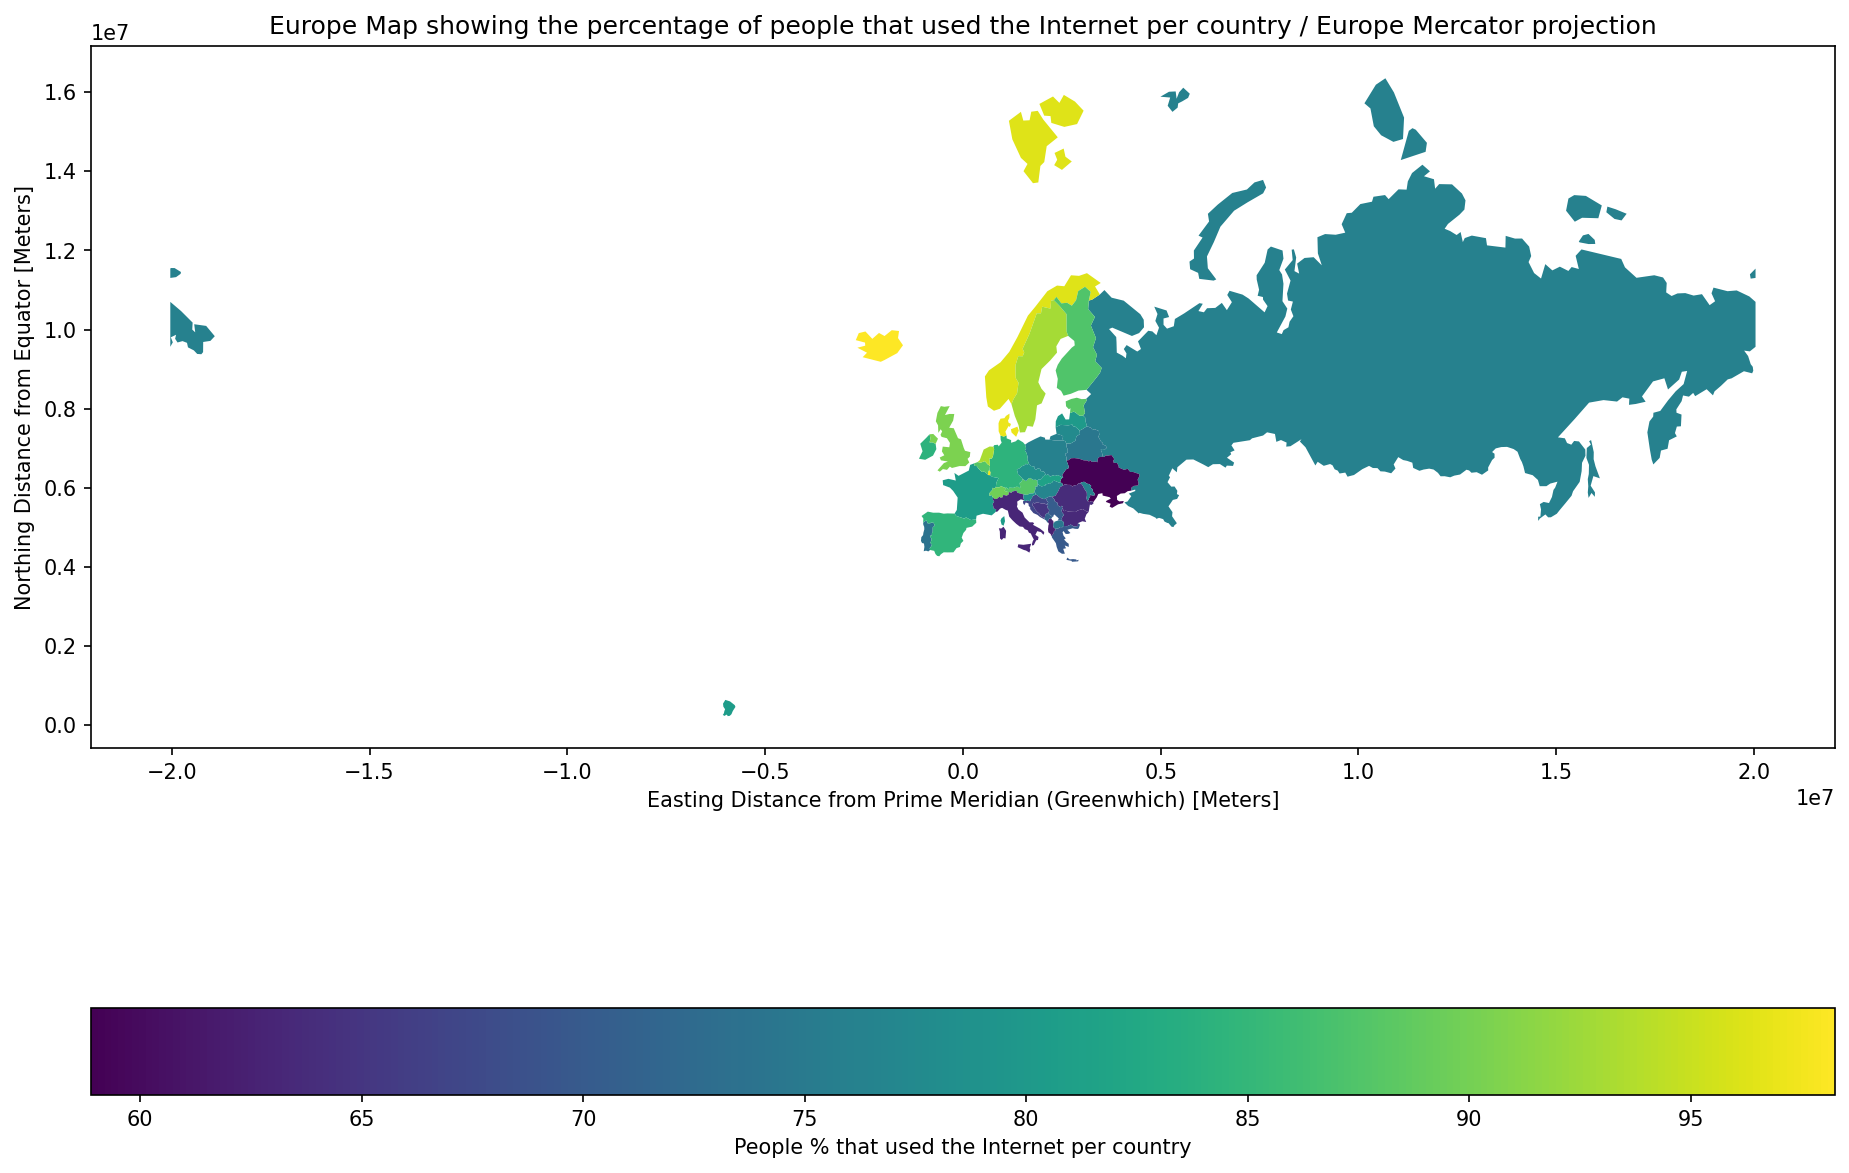

In [32]:
# YOUR CODE HERE

# Because Im scared to add or remove cells, this cell will only work once because your doing the set index and join
# please watch out when running this cell twice, it wont work. Rerun all cells from beginning to let it work!

europe = europe.set_index('iso_a3')
europe = europe.join(df)

fig, ax = plt.subplots(dpi=150, figsize=(15,15))
europe.plot(
    column='2017',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'People % that used the Internet per country',
        'orientation': 'horizontal',
    }
)

plt.title('Europe Map showing the percentage of people that used the Internet per country / Europe Mercator projection')
plt.ylabel('Northing Distance from Equator [Meters]')
plt.xlabel('Easting Distance from Prime Meridian (Greenwhich) [Meters]')
plt.show()

## Let's have a look at other geographic datasets provided by GeoPandas

Next, we want to focus on cities instead of countries

In [33]:
# the 'naturalearth_cities' dataset contains a GeoSeries denoting the locations of capitals of different countries all over the world.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities

C:\Users\quint\AppData\Local\Temp\ipykernel_22572\1029978291.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


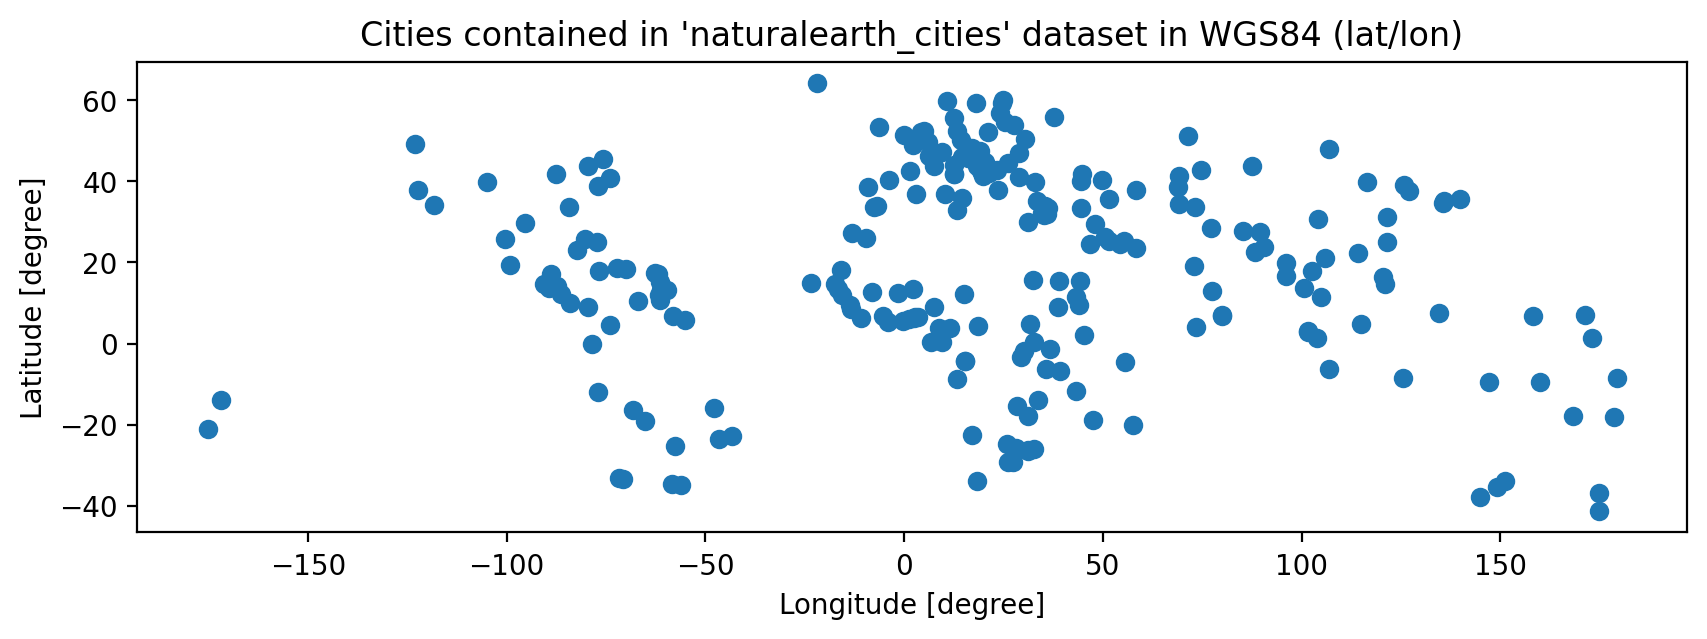

In [34]:
fig, ax = plt.subplots(dpi=200, figsize=(10,10))
cities.plot(ax=ax)
plt.title('Cities contained in \'naturalearth_cities\' dataset in WGS84 (lat/lon)')
plt.ylabel('Latitude [degree]')
plt.xlabel('Longitude [degree]')
plt.show()

In [35]:
# note, that the points withing the column 'geometry' are specified within the WGS84 coordinate reference system
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
# so what do we need to do to plot the countries' capitals on top of their borders?
# first, we need to convert our world GeoDataFrame back to WGS84

world = world.to_crs(epsg=4326)

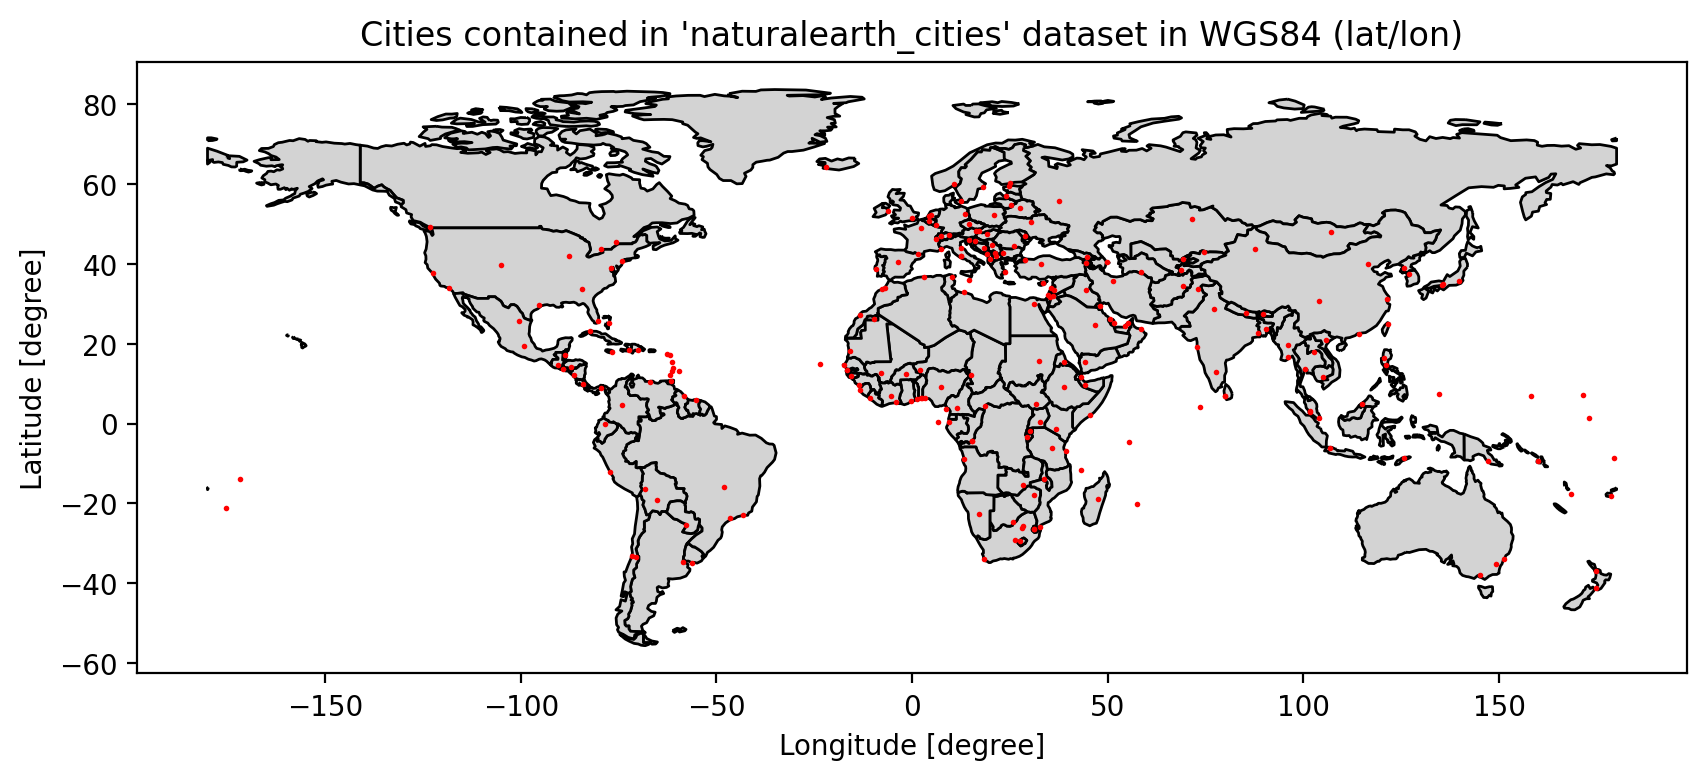

In [37]:
# then, we can overlay the information:
fig, ax = plt.subplots(dpi=200, figsize=(10,10))
base = world.plot(color='lightgrey', edgecolor='black', ax=ax)
cities.plot(ax=base, marker='o', color='red', markersize=1)
plt.title('Cities contained in \'naturalearth_cities\' dataset in WGS84 (lat/lon)')
plt.ylabel('Latitude [degree]')
plt.xlabel('Longitude [degree]')
plt.show()

## TASK 2: Plot Internet Usage of a Single Country over Time (10%)
Use a country of your choice! You can use a simple lineplot for this task.

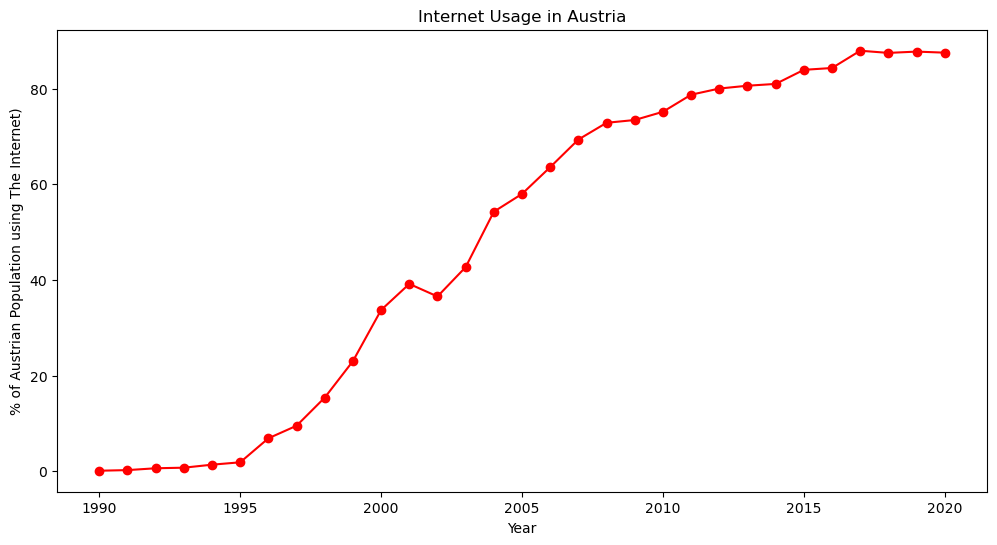

In [38]:
# YOUR CODE HERE

# without the missing values

df = pd.read_csv('internet_usage.csv', skiprows=3)
years = df.columns[4:-1].astype(int)

austria_row = df[df['Country Name'] == 'Austria']
values = austria_row.iloc[:, 4:-1].values.flatten()

years = years[~pd.isna(values)]
values = values[~pd.isna(values)]

plt.figure(figsize=(12, 6))
plt.plot(years, values, marker='o', linestyle='-', color='r')

plt.xlabel('Year')
plt.ylabel('% of Austrian Population using The Internet)')
plt.title('Internet Usage in Austria')

plt.show()

## TASK 3: Plot a map with new data (45%)

Go to the [World Bank Open Data](https://data.worldbank.org/) site. Find and download a new data set. Use this dataset to visualize a new map.

**Be sure to include the downloaded data set when uploading your assignment to Moodle!**

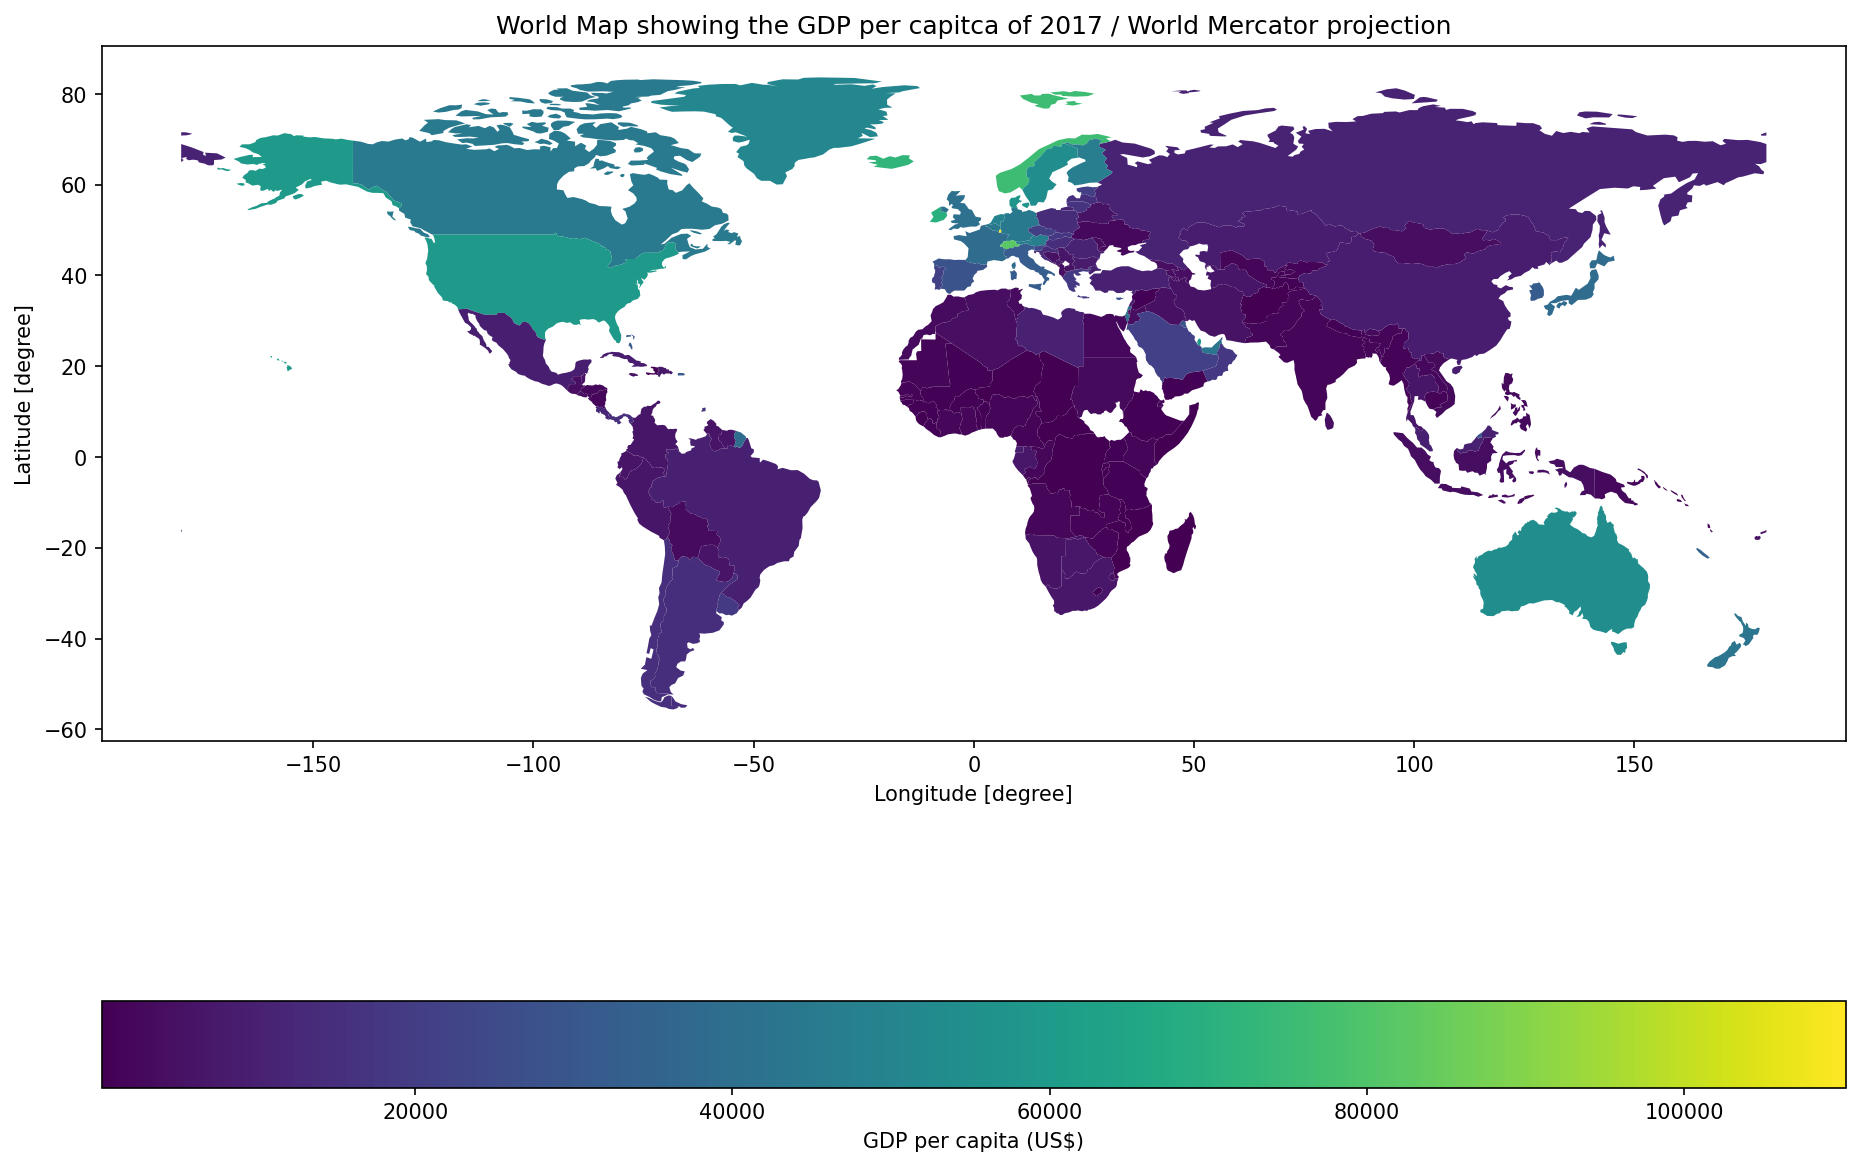

In [39]:
# YOUR CODE HERE
gdp = pd.read_csv('gdp.csv', skiprows=3)
gdp = gdp.loc[:, ['Country Code', '2017']]
gdp = gdp.dropna(axis='index',)
gdp = gdp.set_index('Country Code')
#drop 2017 column from previous excersice
world = world.loc[:, world.columns != '2017']
world = world.join(gdp)
fig, ax = plt.subplots(dpi=150, figsize=(15,15))
world.plot(
    column=year,
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'GDP per capita (US$)',
        'orientation': 'horizontal',
    }
)

plt.title('World Map showing the GDP per capitca of 2017 / World Mercator projection')
plt.ylabel('Latitude [degree]')
plt.xlabel('Longitude [degree]')
plt.show()